# HW: Support Vector Machines & Decision Trees

Use what your have learned in Chapter 5 and Chapter 6 to analyze the following dataset.
In the dataset, there are 4 fields: age, weight, height and size.
Use **weight** and **height** as features to predict the targeet **size**.
The size has three values: **S**, **L**, **XXXL**.
Use Support Vector Machine classifier and Decision Tree classifier to build two classification models and finish the following analysis.

## **Nick Pranske, 113500528**

### 1. (0.5 points) Load the csv file using pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("clothes_size_data.csv")
data

,weight,age,height,size
0,59,36.0,167.64,L
1,65,27.0,175.26,L
2,50,27.0,160.02,S
3,53,32.0,165.10,S
4,63,30.0,170.18,XXXL
...,...,...,...,...
60564,58,35.0,167.64,XXXL
60565,62,40.0,160.02,XXXL
60566,58,35.0,175.26,S
60567,68,28.0,170.18,XXXL


### 2. (1 point) Generate a new dataframe with only fields: weigth, height, and size.

In [3]:
df=data[["weight","height","size"]]
df

,weight,height,size
0,59,167.64,L
1,65,175.26,L
2,50,160.02,S
3,53,165.10,S
4,63,170.18,XXXL
...,...,...,...
60564,58,167.64,XXXL
60565,62,160.02,XXXL
60566,58,175.26,S
60567,68,170.18,XXXL


### 3. (1 point) Use LabelEncoder to encode the target column **size** from strings to numbers

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [6]:
le.fit(df["size"])

LabelEncoder()

In [7]:
le.classes_

array(['L', 'S', 'XXXL'], dtype=object)

In [8]:
df["label"]=le.transform(df["size"])

### 4. (1 point) Make a scatter plot of the whole dataset. You should get a similar figure like this:
<img width="1000" src="https://juxinglong.github.io/static/img/ML/hw56_scatter.png"/>

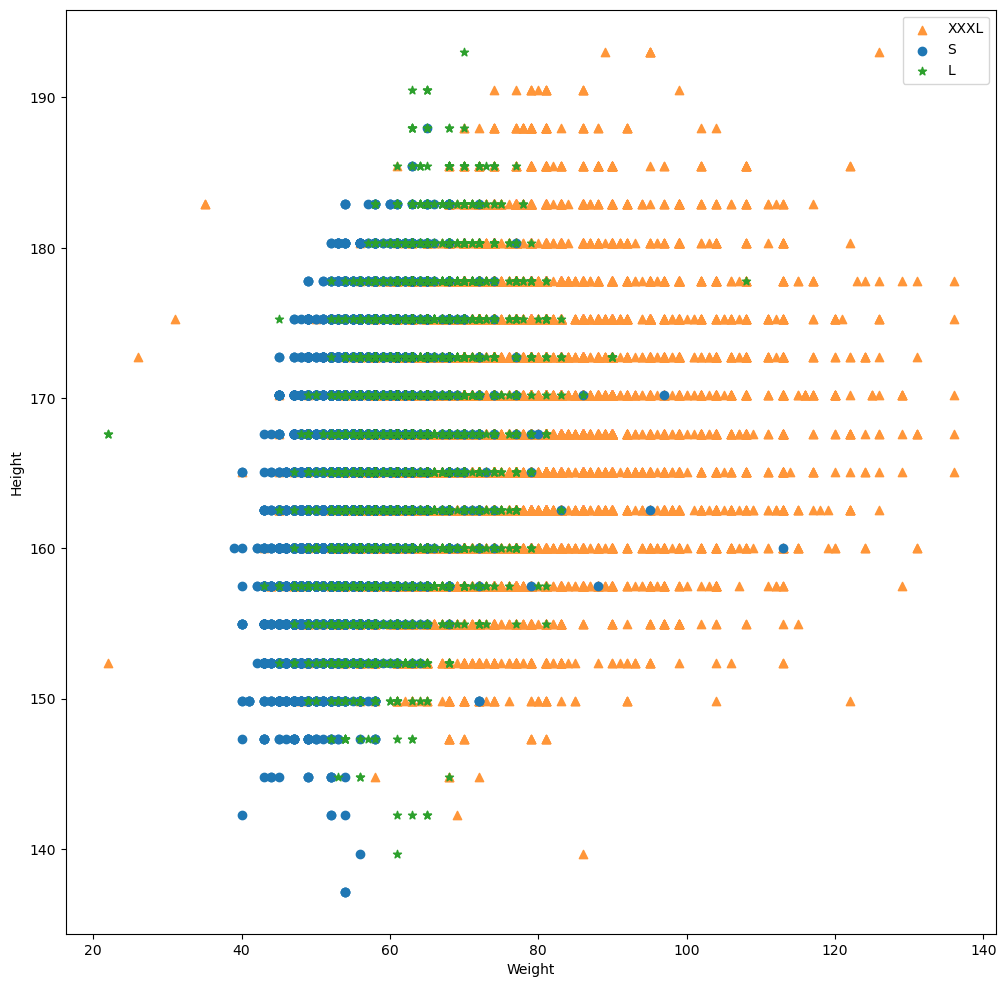

In [9]:
fig1=plt.figure(figsize=(12,12))

c=2 # XXXL
plt.scatter(df[df["label"]==c]["weight"],df[df["label"]==c]["height"],c="#ff9639",label=le.classes_[c],marker="^")

c=1 # Small
plt.scatter(df[df["label"]==c]["weight"],df[df["label"]==c]["height"],c="#1f77b4",label=le.classes_[c])

c=0 # Large
plt.scatter(df[df["label"]==c]["weight"],df[df["label"]==c]["height"],c="#2ca02c",label=le.classes_[c],marker="*")

plt.xlabel("Weight")
plt.ylabel("Height")

plt.legend()
plt.show()

### 5. (1 point) Split the dataset into training and testing. testing ratio: 30%

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_df,test_df=train_test_split(df,test_size=0.3)

In [12]:
X_train=train_df[["height","weight"]]

In [13]:
y_train=train_df["label"]

In [14]:
X_test=test_df[["height","weight"]]

In [15]:
y_test=test_df["label"]

### 6. (1 point) Scale the X training and X testing using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [17]:
std_scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

### 7. (1 point) Use from sklearn.tree import DecisionTreeClassifier to fit a decision tree model
DecisionTreeClassifier(max_depth=3,min_samples_leaf=2000)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2000)

In [21]:
tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2000)

### 8. (1 point) Use the decision tree model to predict the test dataset and calculate the accuracy score of the testing dataset
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_predicted=tree.predict(X_test_scaled)

In [24]:
accuracy=accuracy_score(y_true=y_test,y_pred=y_predicted)
accuracy

0.7984150569588906

### 9. (1 point) Visualize the decision tree. You should get a similar figure like this:
<img width="1000" src="https://juxinglong.github.io/static/img/ML/dt.png"/>

In [25]:
from sklearn.tree import plot_tree

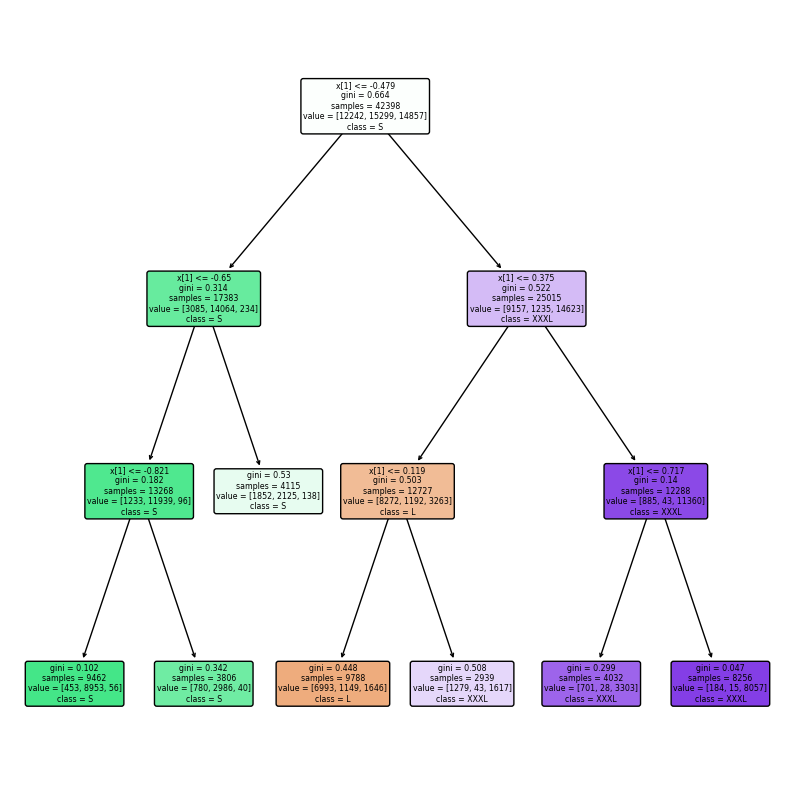

In [26]:
fig2=plt.figure(figsize=(10,10))

plot_tree(decision_tree=tree,rounded=True,filled=True,class_names=le.classes_)

plt.savefig("dt1.svg")

plt.show()

### 10. (1 point) Use from sklearn.svm import  SVC to fit a support vector machine model
SVC(kernel="rbf", gamma=1, C=0.001)

In [27]:
from sklearn.svm import SVC

In [28]:
rbf_svc=SVC(kernel="rbf",gamma=1,C=0.001)

In [29]:
rbf_svc.fit(X_train_scaled,y_train)

SVC(C=0.001, gamma=1)

### 11. (1 point) Use the support vector machine model to predict test dataset and calculate the accuracy score of the testing dataset
from sklearn.metrics import accuracy_score

In [43]:
N=100
w=np.linspace(30,130,N)
h=np.linspace(135,195,N)
WW,HH=np.meshgrid(w,h)
X_new=np.c_[WW.ravel(),HH.ravel()]
X_new_scaled=std_scaler.transform(X_new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
y_new_predicted_rbf=rbf_svc.predict(X_new_scaled)

In [50]:
YY=y_new_predicted.reshape((N,N))

In [51]:
y_test_predicted_rbf.shape

(18171,)

# 12. (3.5 points) Visualize the boundary of the decision tree model. You should get a similar figure like this:
<img width="1000" src="https://juxinglong.github.io/static/img/ML/dt_b.png"/>

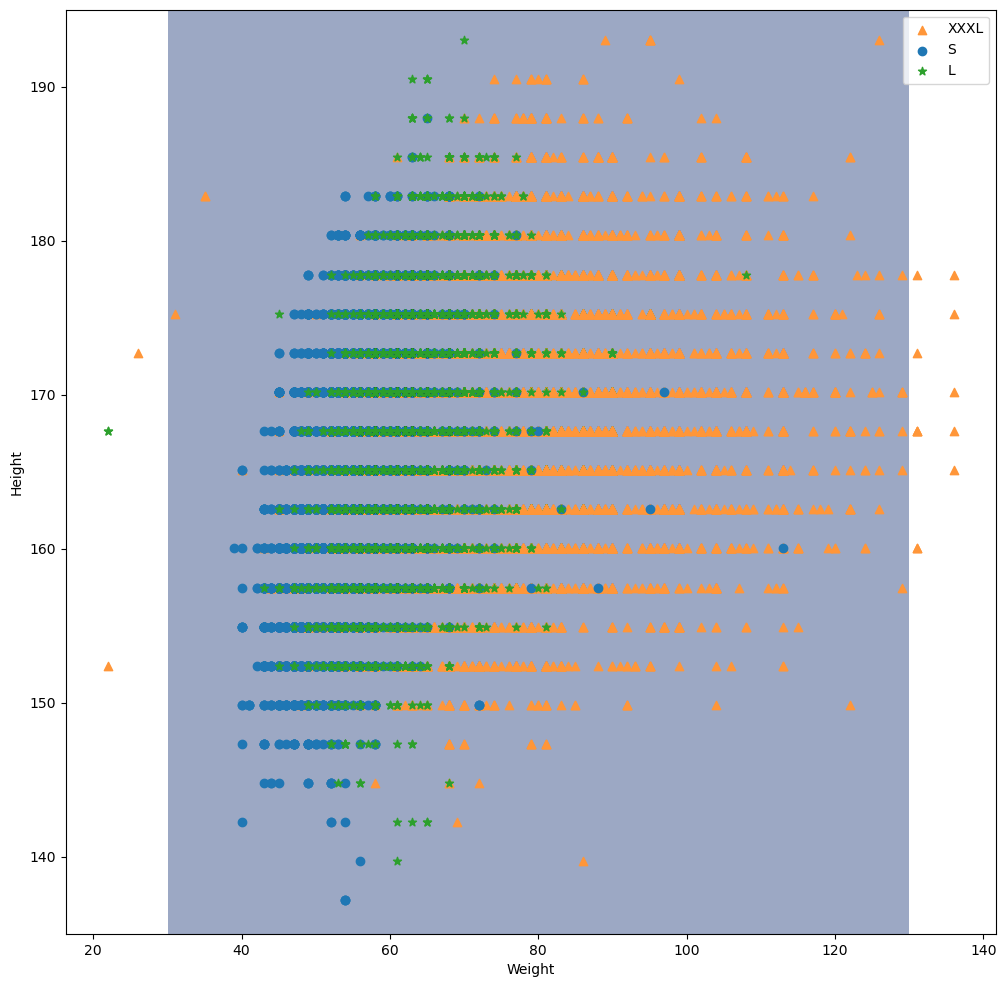

In [55]:
fig=plt.figure(figsize=(12,12))

plt.contourf(WW,HH,YY,alpha=0.5)
c=2 # XXXL
plt.scatter(df[df["label"]==c]["weight"],df[df["label"]==c]["height"],c="#ff9639",label=le.classes_[c],marker="^")

c=1 # Small
plt.scatter(df[df["label"]==c]["weight"],df[df["label"]==c]["height"],c="#1f77b4",label=le.classes_[c])

c=0 # Large
plt.scatter(df[df["label"]==c]["weight"],df[df["label"]==c]["height"],c="#2ca02c",label=le.classes_[c],marker="*")

plt.xlabel("Weight")
plt.ylabel("Height")

plt.legend()

plt.show()

### 13. (3.5 points) Visualize the boundary of the support vector machine model. You should get a similar figure like this:
<img width="1000" src="https://juxinglong.github.io/static/img/ML/svc_b.png"/>

### 14. (2.5 points) Make comments on the generated figures and prediction models.